## Import Libraries

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import accuracy_score



In [55]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

In [56]:
cur_path

'd:\\Artificial_Intelligence\\AI\\ARTIFICIAL_INTELLIGENCE\\Deep_Learning\\Traffic_Signal_Prediction'

In [57]:
for i in range(classes): 
  path = os. path.join(cur_path,'Data\\train', str(i)) 
  # print(path)
  images = os.listdir(path) 
#   print(images)
  for a in images: 
    # print(a)
    try: 
      image = Image.open(path+"/"+a) 
      # print(image)
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
    except: 
      print("Error loading image")
data=np.array(data)
labels=np.array(labels)
  

In [58]:
type(data)

numpy.ndarray

In [59]:
type(labels)

numpy.ndarray

In [60]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Splitting training and testing dataset

In [62]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,random_state=0,test_size=0.2)

In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [66]:
print(y_train)

[ 5  4 35 ... 26 13  2]


## Converting the labels into one hot encoding

In [69]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## CNN model building

In [76]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Compilation of the model

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training and validation

In [78]:
Epoch=15
anc = model.fit(X_train, y_train, batch_size=32, epochs=Epoch, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 63s 64ms/step - loss: 1.7615 - accuracy: 0.5506 - val_loss: 0.4103 - val_accuracy: 0.8931
Epoch 2/15
981/981 [==============================] - 64s 65ms/step - loss: 0.5976 - accuracy: 0.8270 - val_loss: 0.1792 - val_accuracy: 0.9561
Epoch 3/15
981/981 [==============================] - 63s 64ms/step - loss: 0.3816 - accuracy: 0.8891 - val_loss: 0.1289 - val_accuracy: 0.9649
Epoch 4/15
981/981 [==============================] - 64s 65ms/step - loss: 0.3245 - accuracy: 0.9084 - val_loss: 0.1850 - val_accuracy: 0.9475
Epoch 5/15
981/981 [==============================] - 63s 64ms/step - loss: 0.2687 - accuracy: 0.9243 - val_loss: 0.0927 - val_accuracy: 0.9742
Epoch 6/15
981/981 [==============================] - 63s 64ms/step - loss: 0.2499 - accuracy: 0.9299 - val_loss: 0.0674 - val_accuracy: 0.9820
Epoch 7/15
981/981 [==============================] - 63s 64ms/step - loss: 0.2239 - accuracy: 0.9367 - val_loss: 0.0530 - val_accuracy:

In [80]:
? anc

Type:        History
String form: <keras.callbacks.History object at 0x0000019144241850>
File:        c:\users\thoma\anaconda3\lib\site-packages\keras\callbacks.py
Docstring:  
Callback that records events into a `History` object.

This callback is automatically applied to
every Keras model. The `History` object
gets returned by the `fit` method of models.

Example:

>>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
>>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
>>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
...                     epochs=10, verbose=1)
>>> print(history.params)
{'verbose': 1, 'epochs': 10, 'steps': 1}
>>> # check the keys of history object
>>> print(history.history.keys())
dict_keys(['loss'])


In [87]:
print(anc.params)

{'verbose': 1, 'epochs': 15, 'steps': 981}


In [91]:
print(anc.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [89]:
print(anc.history['loss'])

[1.7615325450897217, 0.5976147055625916, 0.38164401054382324, 0.3245307505130768, 0.26873794198036194, 0.2498689442873001, 0.2238987237215042, 0.22583207488059998, 0.2000080645084381, 0.21543888747692108, 0.2008405476808548, 0.23155555129051208, 0.2103726863861084, 0.20873801410198212, 0.20043791830539703]


## plotting graphs for accuracy

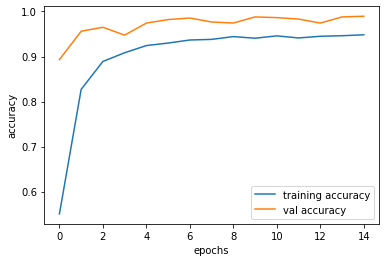

In [98]:
plt.figure(0)

plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

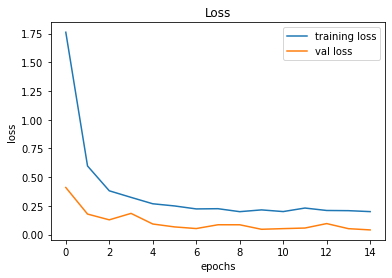

In [100]:
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Model testing

In [103]:
test_data = pd.read_csv("D:\Artificial_Intelligence\AI\ARTIFICIAL_INTELLIGENCE\Deep_Learning\Traffic_Signal_Prediction\Data\Test.csv")

In [111]:
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [110]:
test_data.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [115]:
test_data["ClassId"].unique()

array([16,  1, 38, 33, 11, 18, 12, 25, 35,  7, 23,  4,  9, 21, 20, 27,  3,
       13, 10,  5, 17, 34,  2,  8, 30, 24, 15, 26, 28, 22, 14, 32, 29,  6,
       36, 40, 41, 31, 19,  0, 39, 42, 37], dtype=int64)

In [145]:
labels = test_data["ClassId"].values
imgs = test_data["Path"].values
data=[]
for img in imgs:
    image = Image.open("Data"+"/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
# pred = model.predict_classes(X_test)
pred=model.predict(X_test) 
classes_x=np.argmax(pred,axis=1)

395/395 [==============================] - 3s 9ms/step


In [147]:
pred

array([[8.0588089e-29, 1.2872069e-17, 1.5993689e-21, ..., 2.7352714e-20,
        4.5318191e-23, 2.7749724e-31],
       [2.9777152e-22, 1.0000000e+00, 2.1559253e-13, ..., 4.1538258e-16,
        0.0000000e+00, 2.5322929e-33],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.8673794e-03, 7.8584775e-02, 5.5975720e-02, ..., 7.8229839e-03,
        2.9274847e-02, 4.2078990e-02],
       [7.2231660e-19, 1.8231723e-09, 3.9751227e-10, ..., 9.0473317e-14,
        6.7993594e-23, 2.5415569e-17],
       [8.5484220e-19, 3.7238924e-13, 6.0259324e-12, ..., 2.3769910e-12,
        5.1346015e-15, 2.7392639e-11]], dtype=float32)

In [146]:
classes_x

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [150]:
print(accuracy_score(labels, classes_x))

0.9520190023752969


In [153]:
model.save('traffic_classifier.h1')

INFO:tensorflow:Assets written to: traffic_classifier.h1\assets


INFO:tensorflow:Assets written to: traffic_classifier.h1\assets
